<a href="https://colab.research.google.com/github/Serhii-Kravchenko-2022/Home_work_Data_Science8/blob/main/HomeWork6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кравченко Сергій
Домашнє завдання модуль №6


# Кластериація та зменшення розмірності

# Завдання 1
Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом

Завантажуємо файли з двовимірним датасетом та датасетом mnist

In [3]:
import pandas as pd
from google.colab import drive


drive.mount('/DataScience8')

file_data_2d = '/DataScience8/MyDrive/DataScience8/data6/data_2d.csv'
file_mnist = '/DataScience8/MyDrive/DataScience8/data6/mnist.csv'
data_2d = pd.read_csv(file_data_2d)
mnist = pd.read_csv(file_mnist)
data_2d.head()



Drive already mounted at /DataScience8; to attempt to forcibly remount, call drive.mount("/DataScience8", force_remount=True).


,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


In [4]:
mnist.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Функція втрат, котру для кластеризації ще називають distortion

In [5]:
from sklearn.cluster import KMeans

def k_means(frame):
    distortions = []
    for k in range(1, 10):
        k_meanModel = KMeans(n_clusters=k, n_init='auto')
        k_meanModel.fit(frame)
        distortions.append(k_meanModel.inertia_)

    return distortions

Функція візуалізації

In [12]:
import matplotlib.pyplot as plt

def show_k(distortions):
    plt.figure(figsize=(10,8))
    plt.plot(range(1, 10), distortions, 'bx-')
    plt.xlabel('Кількість кластерів, k')
    plt.ylabel('Функція втрат')
    plt.title('Графік "ліктя", який показує залежність функції втрат від кількості кластерів, k')
    plt.show()

Візуалізуємо графік "ліктя", який показує залежність функції втрат від кількості кластерів для data_2d

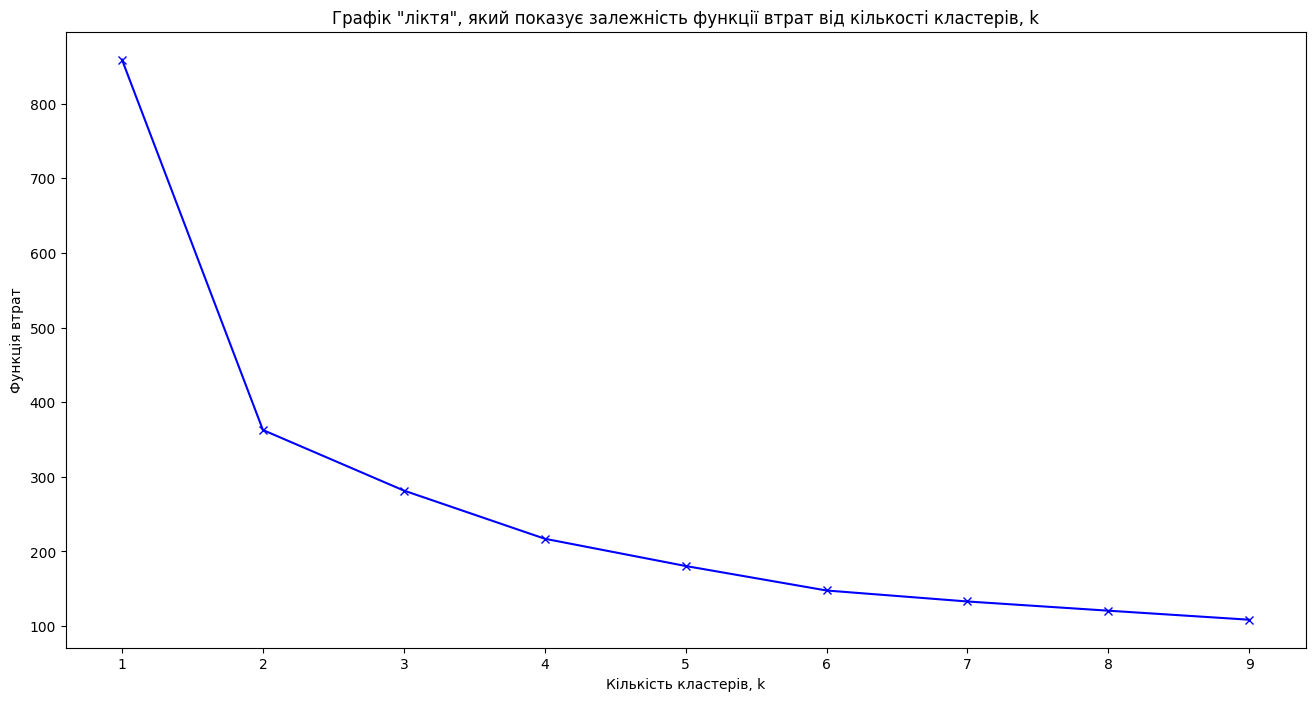

In [21]:
show_k(k_means(data_2d))

Оптимальна кількість кластерів для data_2d дорівнює 2

Візуалізуємо графік "ліктя", який показує залежність функції втрат від кількості кластерів для minst

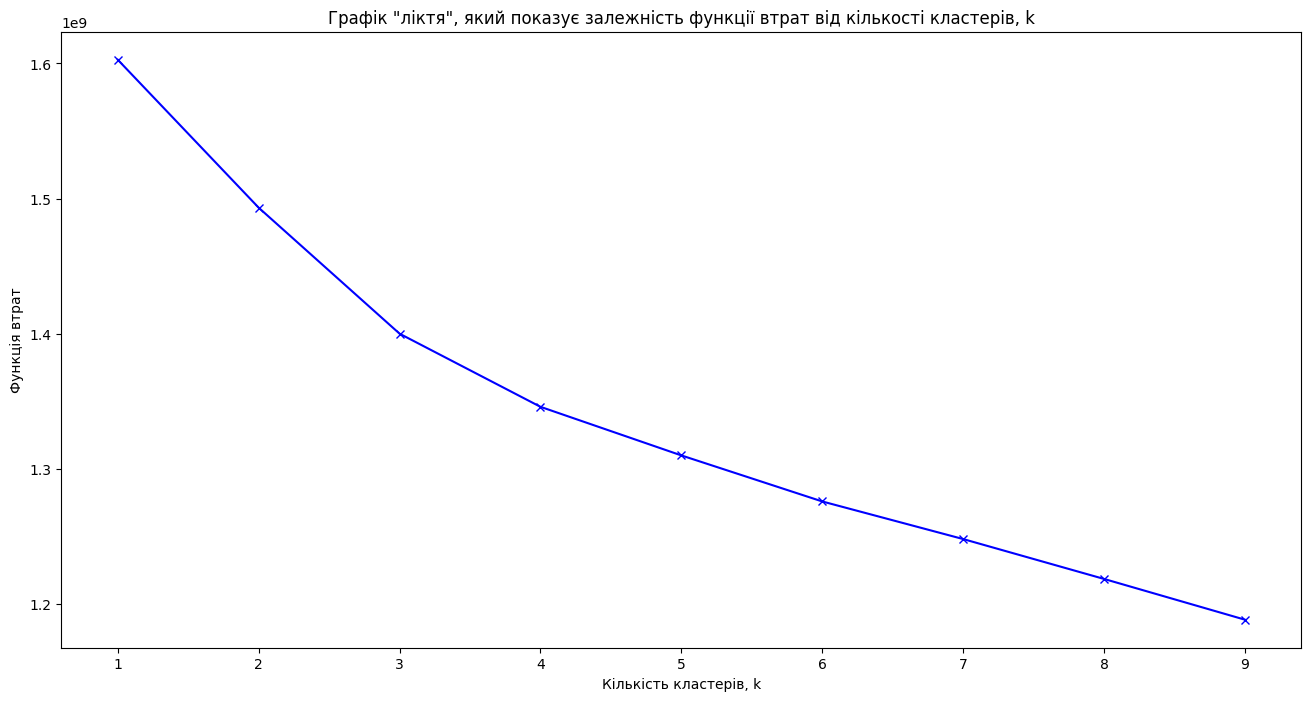

In [22]:
show_k(k_means(mnist))

Зменшимо розмірність даних minst до 2-вимірного варіанту:

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
mnist_2d = pca.fit_transform(mnist)

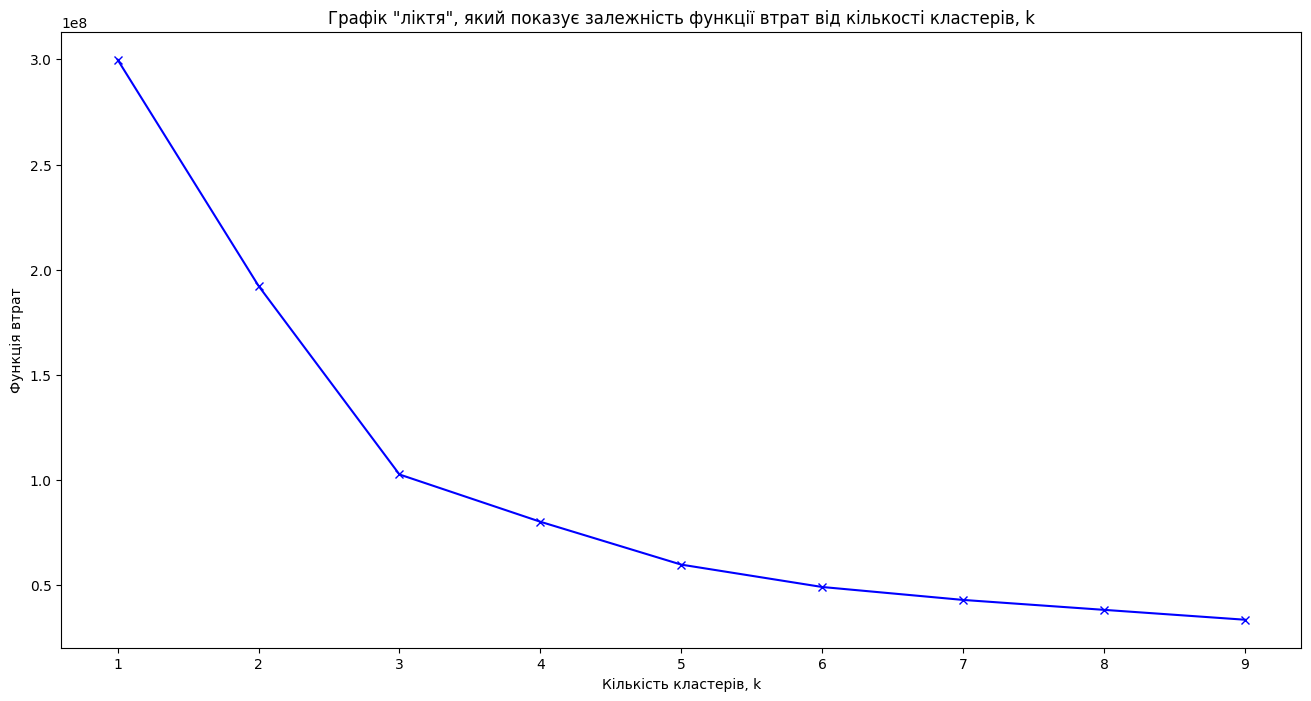

In [23]:
show_k(k_means(mnist_2d))

Оптимальна кількість кластерів для minst_2d дорівнює 3

# Завдання 2
Візуалізуйте результат роботи кластеризації

Функція візуалізаціі

In [19]:
import seaborn as sns

def show_clustering(data, k):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(data)

    plt.figure(figsize=(10,8))
    sns.scatterplot(x=data[:,0], y=data[:,1], c= kmeans.labels_, cmap='cool' )
    sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

Візуалізуємо результат роботи кластеризації data_2d:

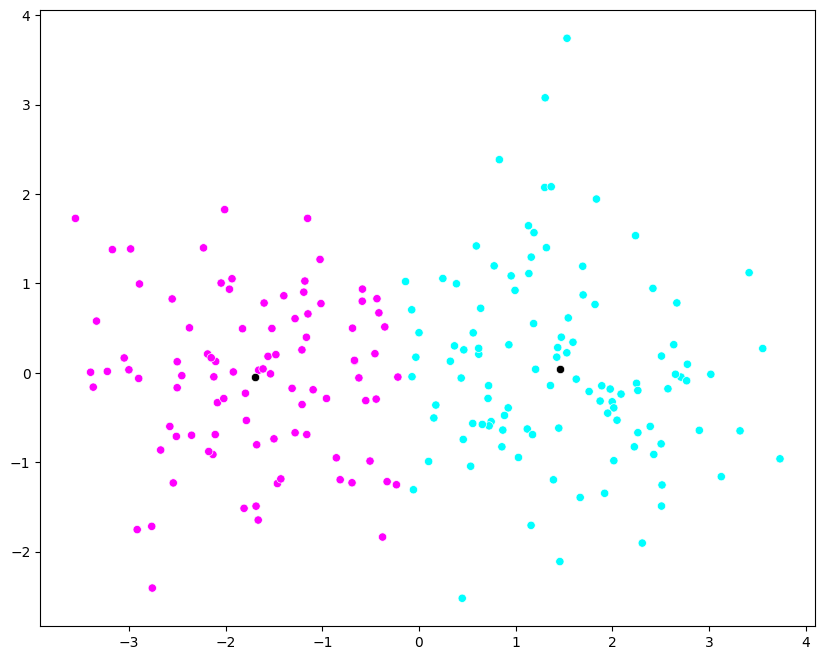

In [20]:
show_clustering(pca.fit_transform(data_2d), 2)

Візуалізуємо результат роботи кластеризації mnist_2d:

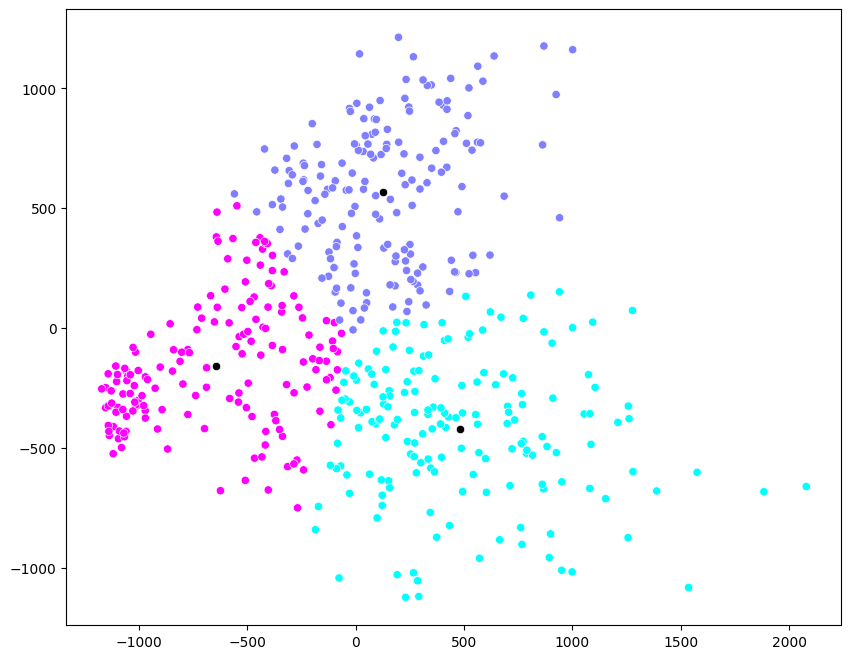

In [24]:
show_clustering(mnist_2d, 3)